<a href="https://colab.research.google.com/github/SHIVA20-GUPTA/FlightPrice/blob/main/Forest_Cover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## BUSINESS CASE:- Create a predictive model which helps  to predict seven different cover types in four different wilderness areas of the Roosevelt National Forest of Northern Colorado Forest with the best accuracy.

In [ ]:
# Imported library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

In [ ]:
#loading the data set
data=pd.read_csv("PRCP-1005-ForestCoverPred.zip",encoding='latin-1')

## Basic checks

In [ ]:
data.head() #top 5 rows

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [ ]:
data.tail() # bottom 5 row

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [ ]:
data.shape # check total number of row and column.

(15120, 56)

## INTRODUCTION OF PROJECT
* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation
  * The wilderness areas are:
     1 - Rawah Wilderness Area
     2 - Neota Wilderness Area
     3 - Comanche Peak Wilderness Area
     4 - Cache la Poudre Wilderness Area
  * The soil types are:
     1 Cathedral family - Rock outcrop complex, extremely stony.
     2 Vanet - Ratake families complex, very stony.
     3 Haploborolis - Rock outcrop complex, rubbly.
     4 Ratake family - Rock outcrop complex, rubbly.
     5 Vanet family - Rock outcrop complex complex, rubbly.
     6 Vanet - Wetmore families - Rock outcrop complex, stony.
     7 Gothic family.
     8 Supervisor - Limber families complex.
     9 Troutville family, very stony.
     10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
     11 Bullwark - Catamount families - Rock land complex, rubbly.
     12 Legault family - Rock land complex, stony.
     13 Catamount family - Rock land - Bullwark family complex, rubbly.
     14 Pachic Argiborolis - Aquolis complex.
     15 unspecified in the USFS Soil and ELU Survey.
     16 Cryaquolis - Cryoborolis complex.
     17 Gateview family - Cryaquolis complex.
     18 Rogert family, very stony.
     19 Typic Cryaquolis - Borohemists complex.
     20 Typic Cryaquepts - Typic Cryaquolls complex.
     21 Typic Cryaquolls - Leighcan family, till substratum complex.
     22 Leighcan family, till substratum, extremely bouldery.
     23 Leighcan family, till substratum - Typic Cryaquolls complex.
     24 Leighcan family, extremely stony.
     25 Leighcan family, warm, extremely stony.
     26 Granile - Catamount families complex, very stony.
     27 Leighcan family, warm - Rock outcrop complex, extremely stony.
     28 Leighcan family - Rock outcrop complex, extremely stony.
     29 Como - Legault families complex, extremely stony.
     30 Como family - Rock land - Legault family complex, extremely stony.
     31 Leighcan - Catamount families complex, extremely stony.
     32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
     33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
     34 Cryorthents - Rock land complex, extremely stony.
     35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
     36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
     37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
     38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
     39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
     40 Moran family - Cryorthents - Rock land complex, extremely stony.


### TARGET VARIABLE= COVER TYPE

In [ ]:
data.Cover_Type.unique() # check unique value in column

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [ ]:
data['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

* We see that all classes have an equal presence. No class re-balancing is necessary

* Cover type is a discrete variable with values 1-7 depending on the cover type.

In [ ]:
data.info() # check non null values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

* NO null values present in data that's mean no need to handle it.
* No object data type in data means no need to handle categorical data.
* Well since all are numeric integer and should be so, then we do not need to do any convertions here.

In [ ]:
pd.set_option('display.max_columns',None) # show all column
data.describe() # seeing the data statistics of numerical data like mean, mode , std.. e.t.c

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000 

In [ ]:
data.columns # check all columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [ ]:
data = data.iloc[:,1:] #Drop the first column 'Id' since it just has serial numbers. Not useful in the prediction process.
data.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   

   Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
0            0            0            0            0            0   
1            0            0            0            0            0   

   Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
0            0            0            0            0            0   
1            0            0            0            0            0   

   Soil_Type40  Cover_Type  
0            0           5  
1            0           5

## Exploratory Data Analysis

### Univariate Analysis

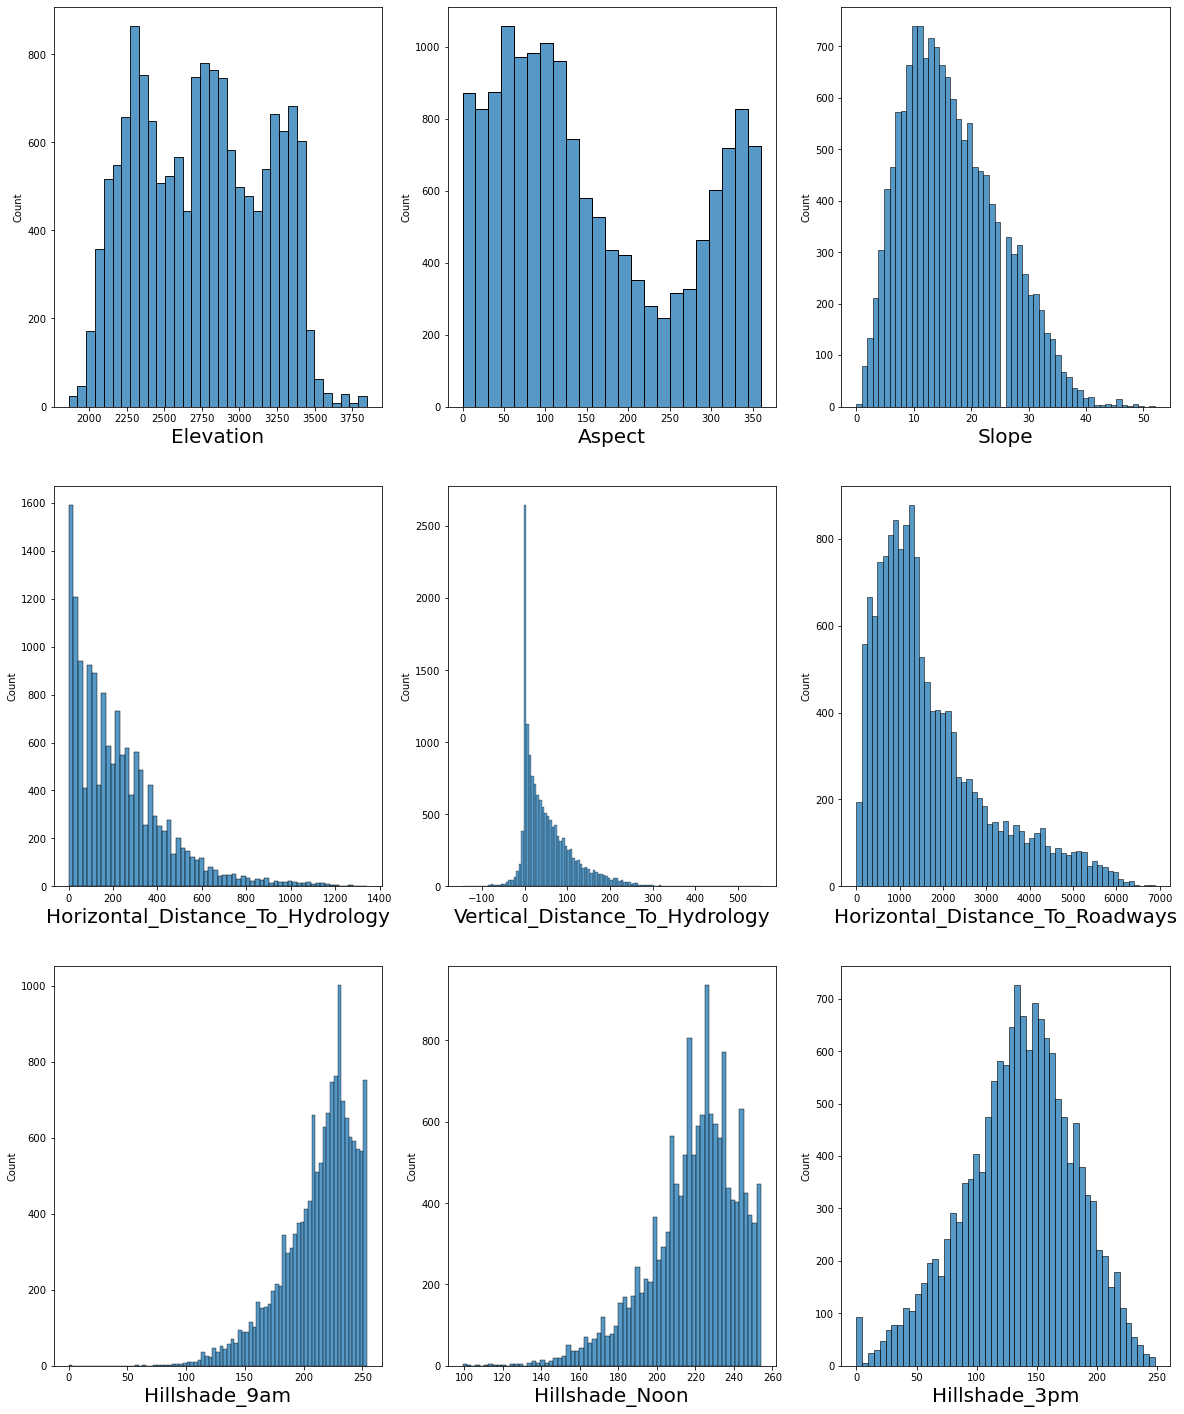

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
data1=data[['Elevation','Aspect', 'Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
   'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
   'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]


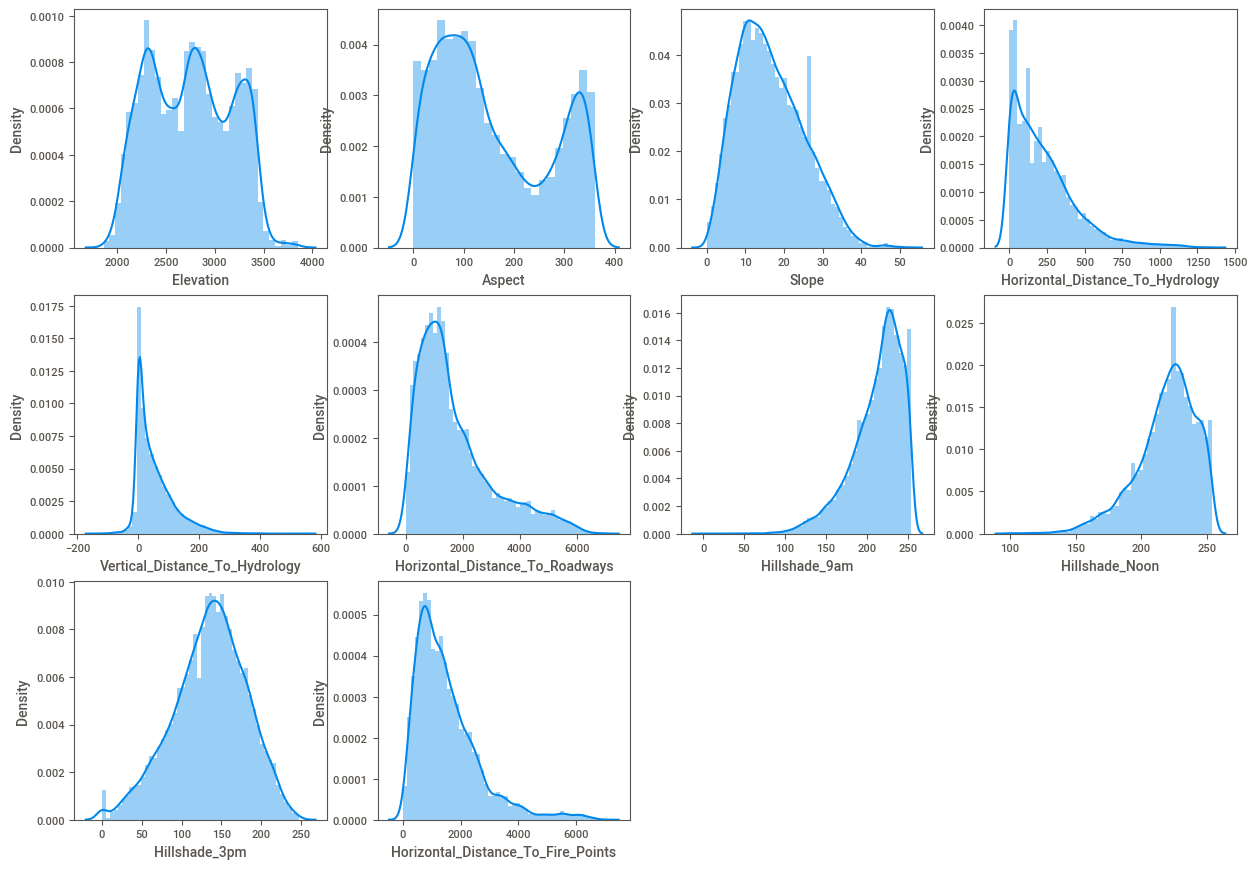

In [ ]:
plt.figure(figsize = (15,60), facecolor = 'white')
plotnumber = 1

for column in data1:
  plt.subplot(16,4, plotnumber)
  sns.distplot(data1[column])
  plt.xlabel(column, fontsize = 10)
  plotnumber+=1

plt.show()

* Hillshade_9am and Hillshade_Noon are left or negatively skewed distributions where they take on max value between 200-250 index value for most observations in each class. While Hillshade_3pm has normal distribution for all classes.
* Horizontal distance to hydrology has the right or positively skewed distribution where most of the values for all classes are towards 0-50m.Vertical distance to hydrology is also positively skewed distribution but this takes on values much closer to 0 for all classes for most observations

In [ ]:
Wild_data=data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']]
Soil_data=data[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6','Soil_Type7' ,'Soil_Type8', 'Soil_Type9',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type14','Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']]

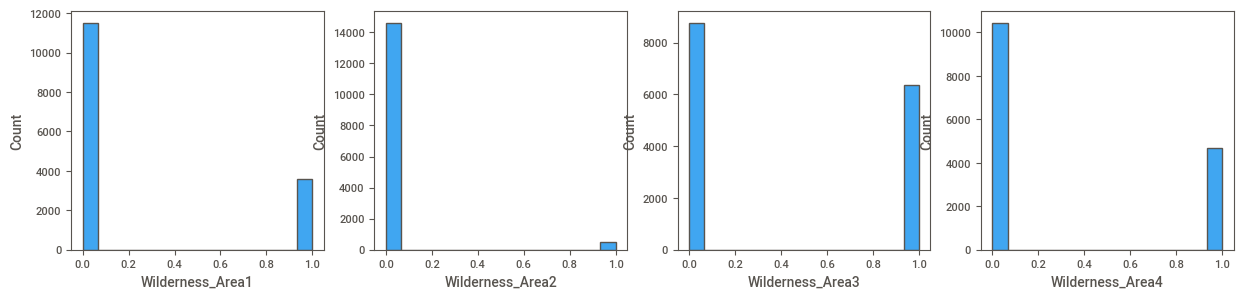

In [ ]:
plt.figure(figsize = (15,60), facecolor = 'white')
plotnumber = 1

for column in Wild_data:
  plt.subplot(16,4, plotnumber)
  sns.histplot(Wild_data[column])
  plt.xlabel(column, fontsize = 10)
  plotnumber+=1

plt.show()

## Bivariate Analysis

#### Visualize the relation between cover type and numeric features

In [ ]:
data1

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  
0                                    6279  
1                                    6225  
2                                    6121  
3                                    6211  
4                                    6172  
...                                   ...  
15115                                1282  
15116                                1325  
15117                                1187  
15118                                 932  
15119                                 914  

[15120 rows x 10 columns]

<Figure size 2000x2500 with 0 Axes>

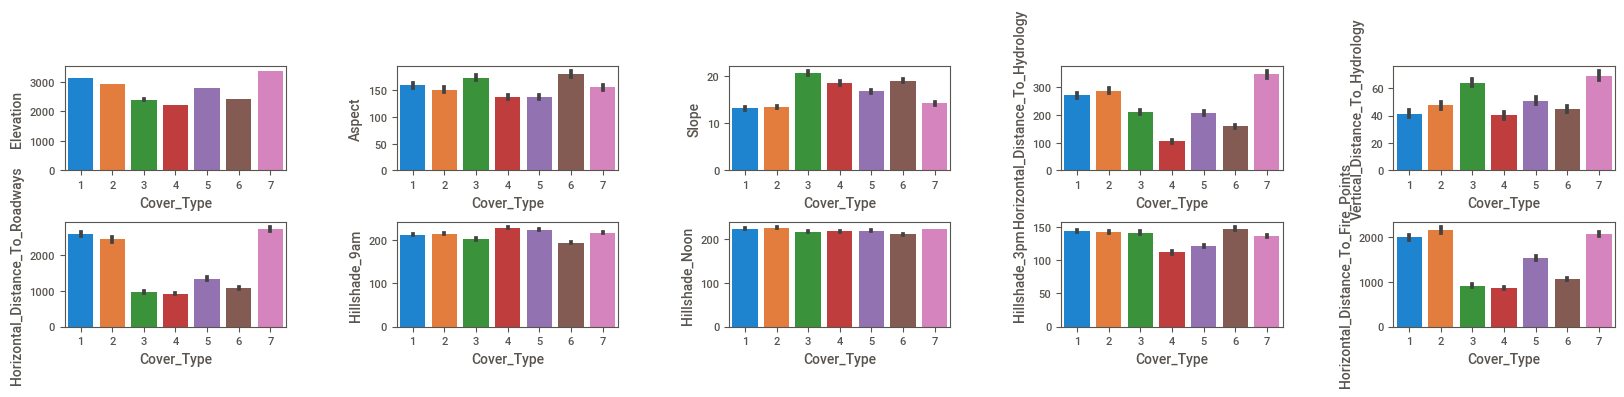

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

fig=plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
i=1
rows=10
cols=5
for col in data1:
    ax=fig.add_subplot(rows, cols, i)
    sns.barplot(x='Cover_Type', y=col, data=data)
    plt.ylabel(col)
    i+=1


*  All 7 type cover tree have 'Elevation','Aspect', 'Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
   'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'.
*  THe cover tree 3,4,5,6 have 10000m Horizontal distance to roadways and other have above 2000m  
*  Cover tree 3,4,6  Vertical distance to roadways lies between 100-150m other have more than 150 m.
*  Cover tree 3,4,6  have about 1000m Horizontal distance to firepoints other have more than 1500m.
*  The hillshade(9am,Noon,3pm) almost equal summer solstice.

#### Visualize  the relation between cover type and categorical features

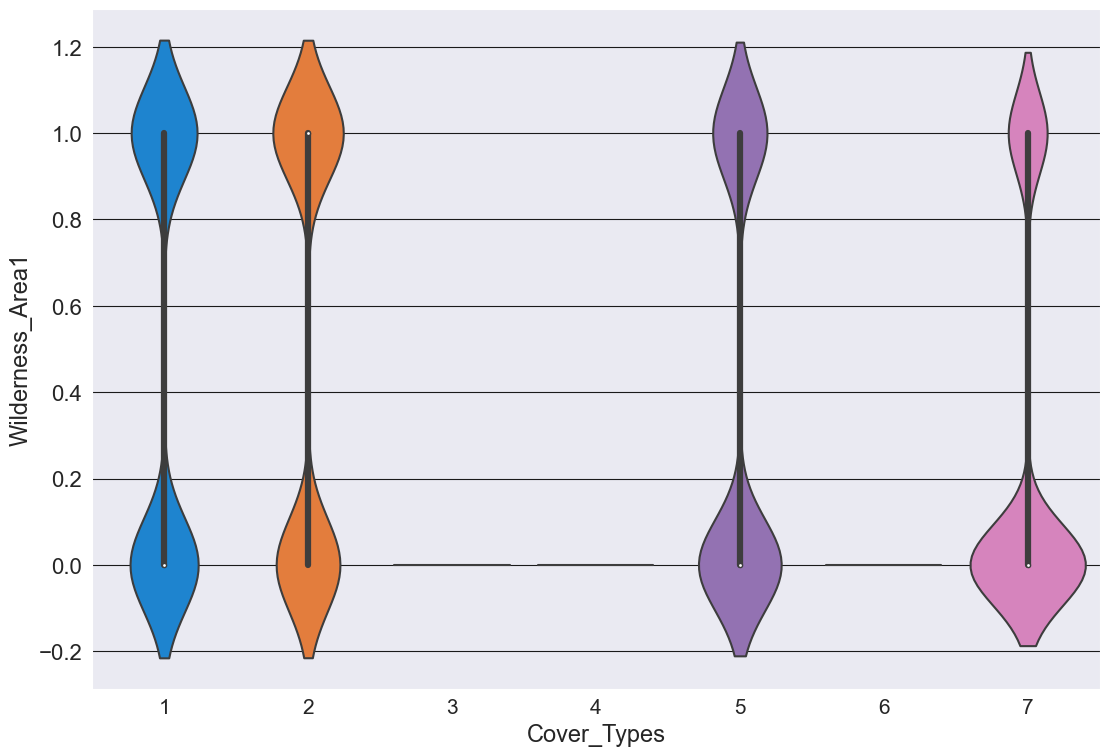

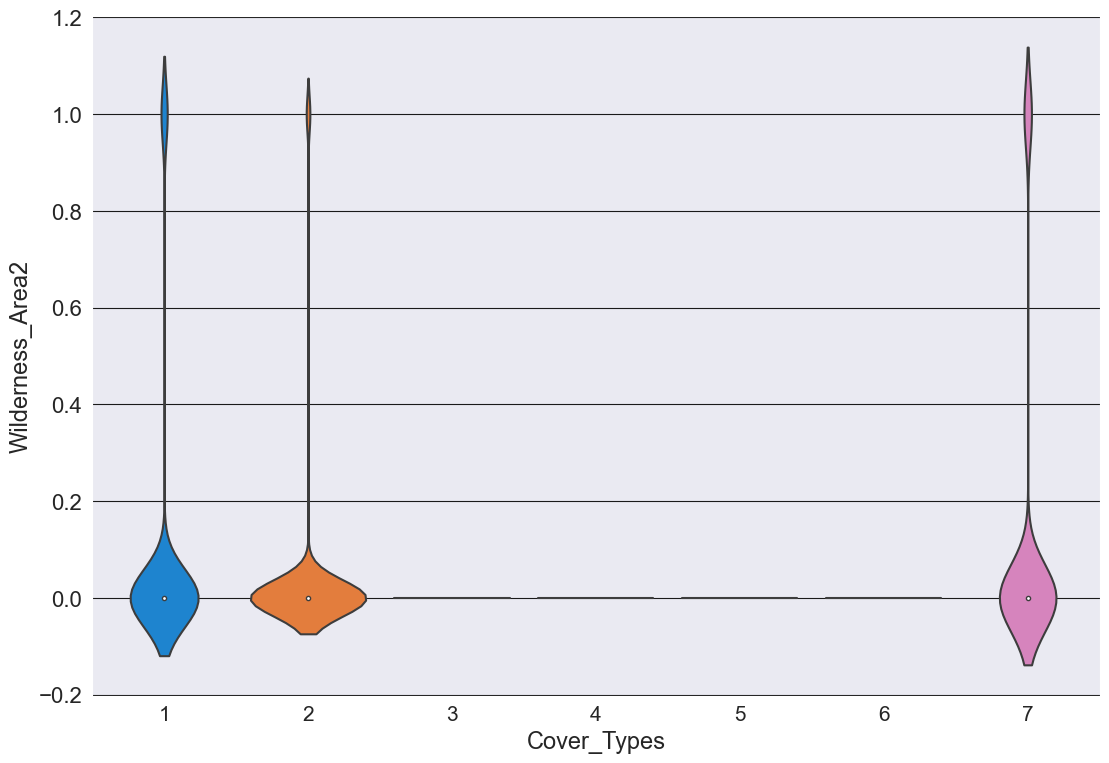

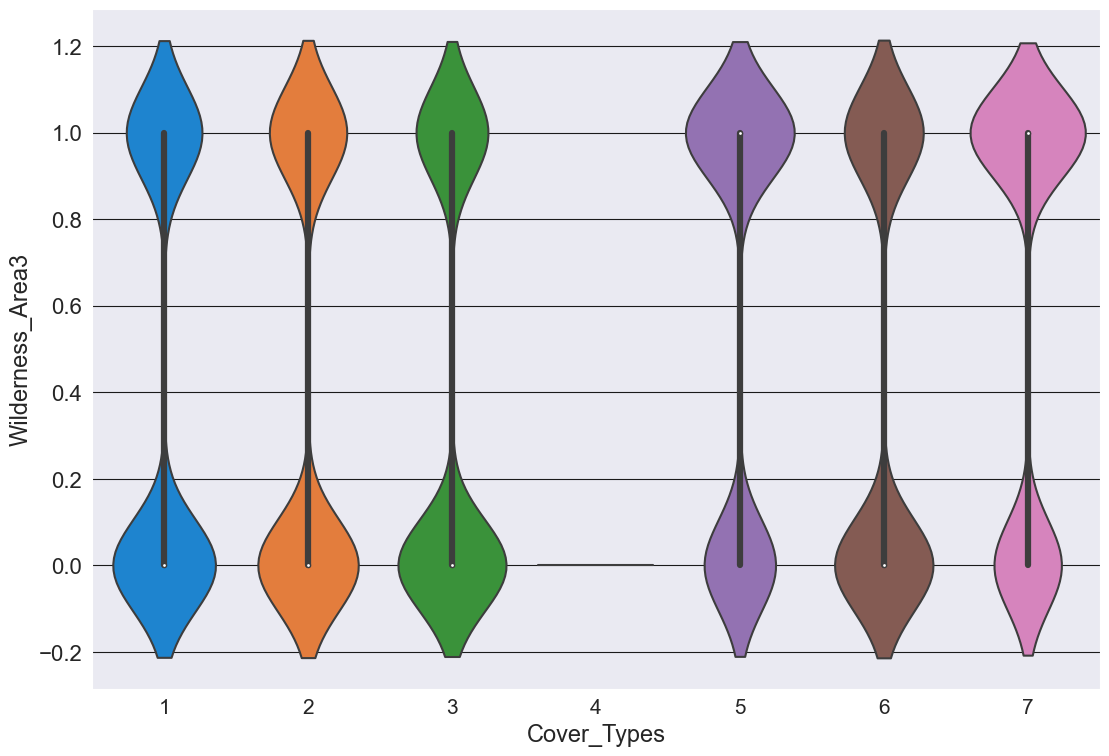

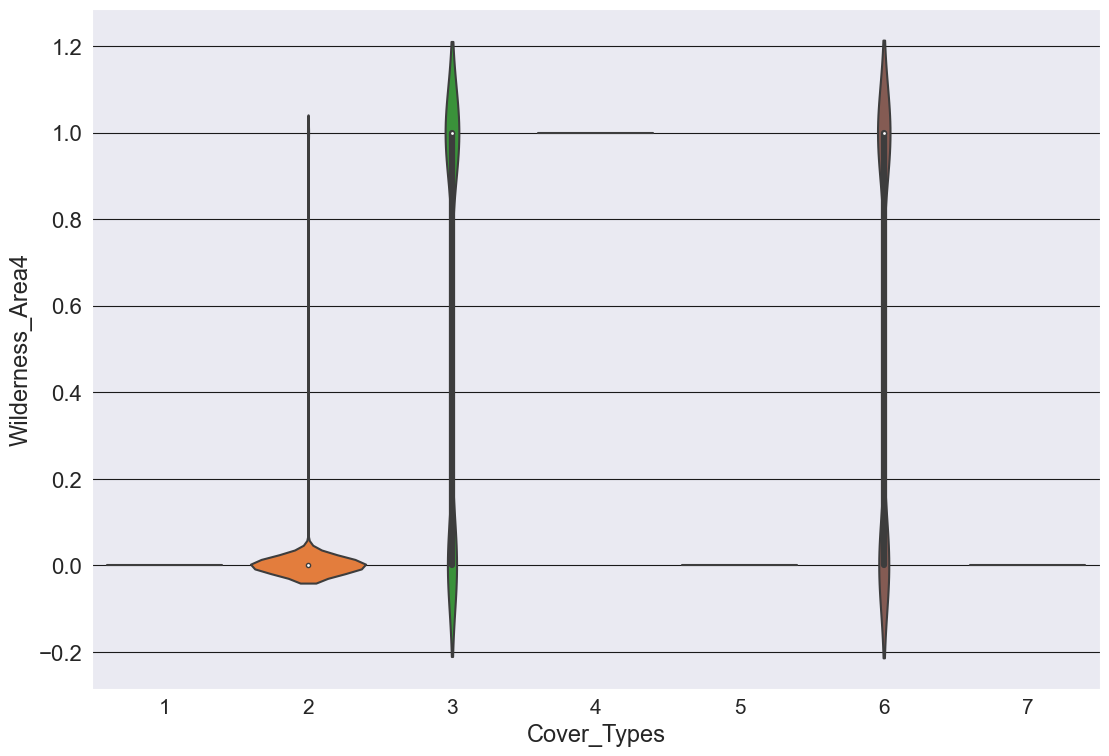

In [ ]:
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data['Cover_Type']
# features to be compared with target variable
features = Wild_data.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(13, 9))
    
    # Plot violin for i feature for every class in target
    sns.violinplot(data = Wild_data, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Cover_Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)
    plt.show()
   

* Wilderness Area 1 belong to forest cover type 1, 2, 5 and 7 while wilderness area 3 shows presence in all classes except Forest Cover Type 4.

* Wilderness Area 2 and 4 have less observations, their dense is less on 1 on all classes compared to other two Wilderness Areas 1 and 3.

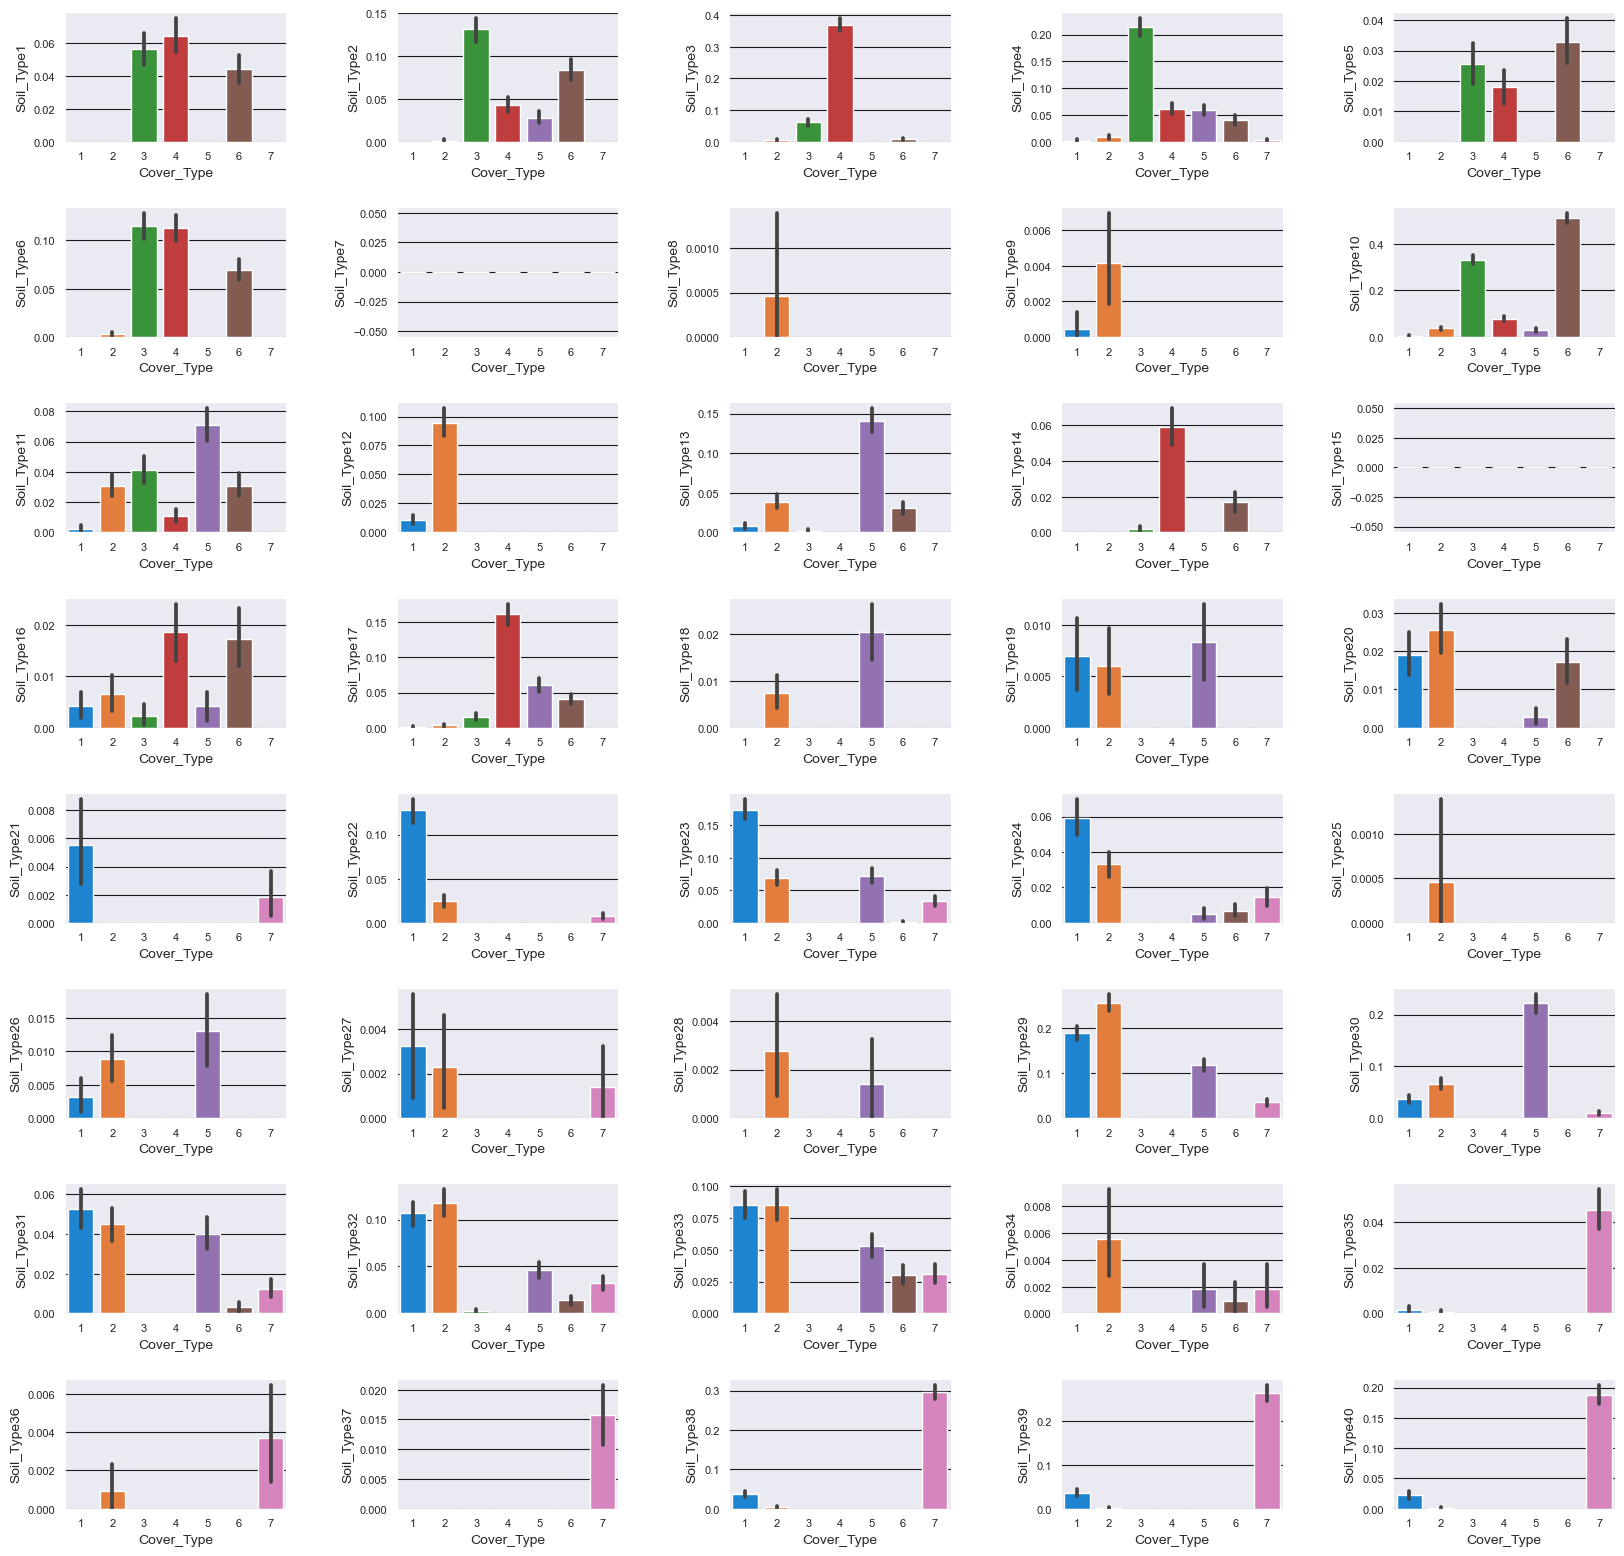

In [ ]:
fig=plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
i=1
rows=10
cols=5
for col in Soil_data:
    ax=fig.add_subplot(rows,cols,i)
    sns.barplot(x='Cover_Type',y=col,data=data)
    plt.ylabel(col)
    i+=1

* Soil Type 4 is the only Soil Type that has presence in all classes of forest cover types.
* Soil_Type7 and Soil_Type15 has no cover_type.
* Soil Type 10, 11,16and 17 belong to forest class 1, 2,3,4,5,6  respectively.
* Soil Type 22,27,35,38,39,40 belong to forest class 1,2and 7 respectively
* Forest Cover Type 4 seems to have less presence compared to all classes for Soil Types having least observation too otherside forest cover type 2 seems to have more presence.

## Multivariate analysis

<Figure size 800x800 with 0 Axes>

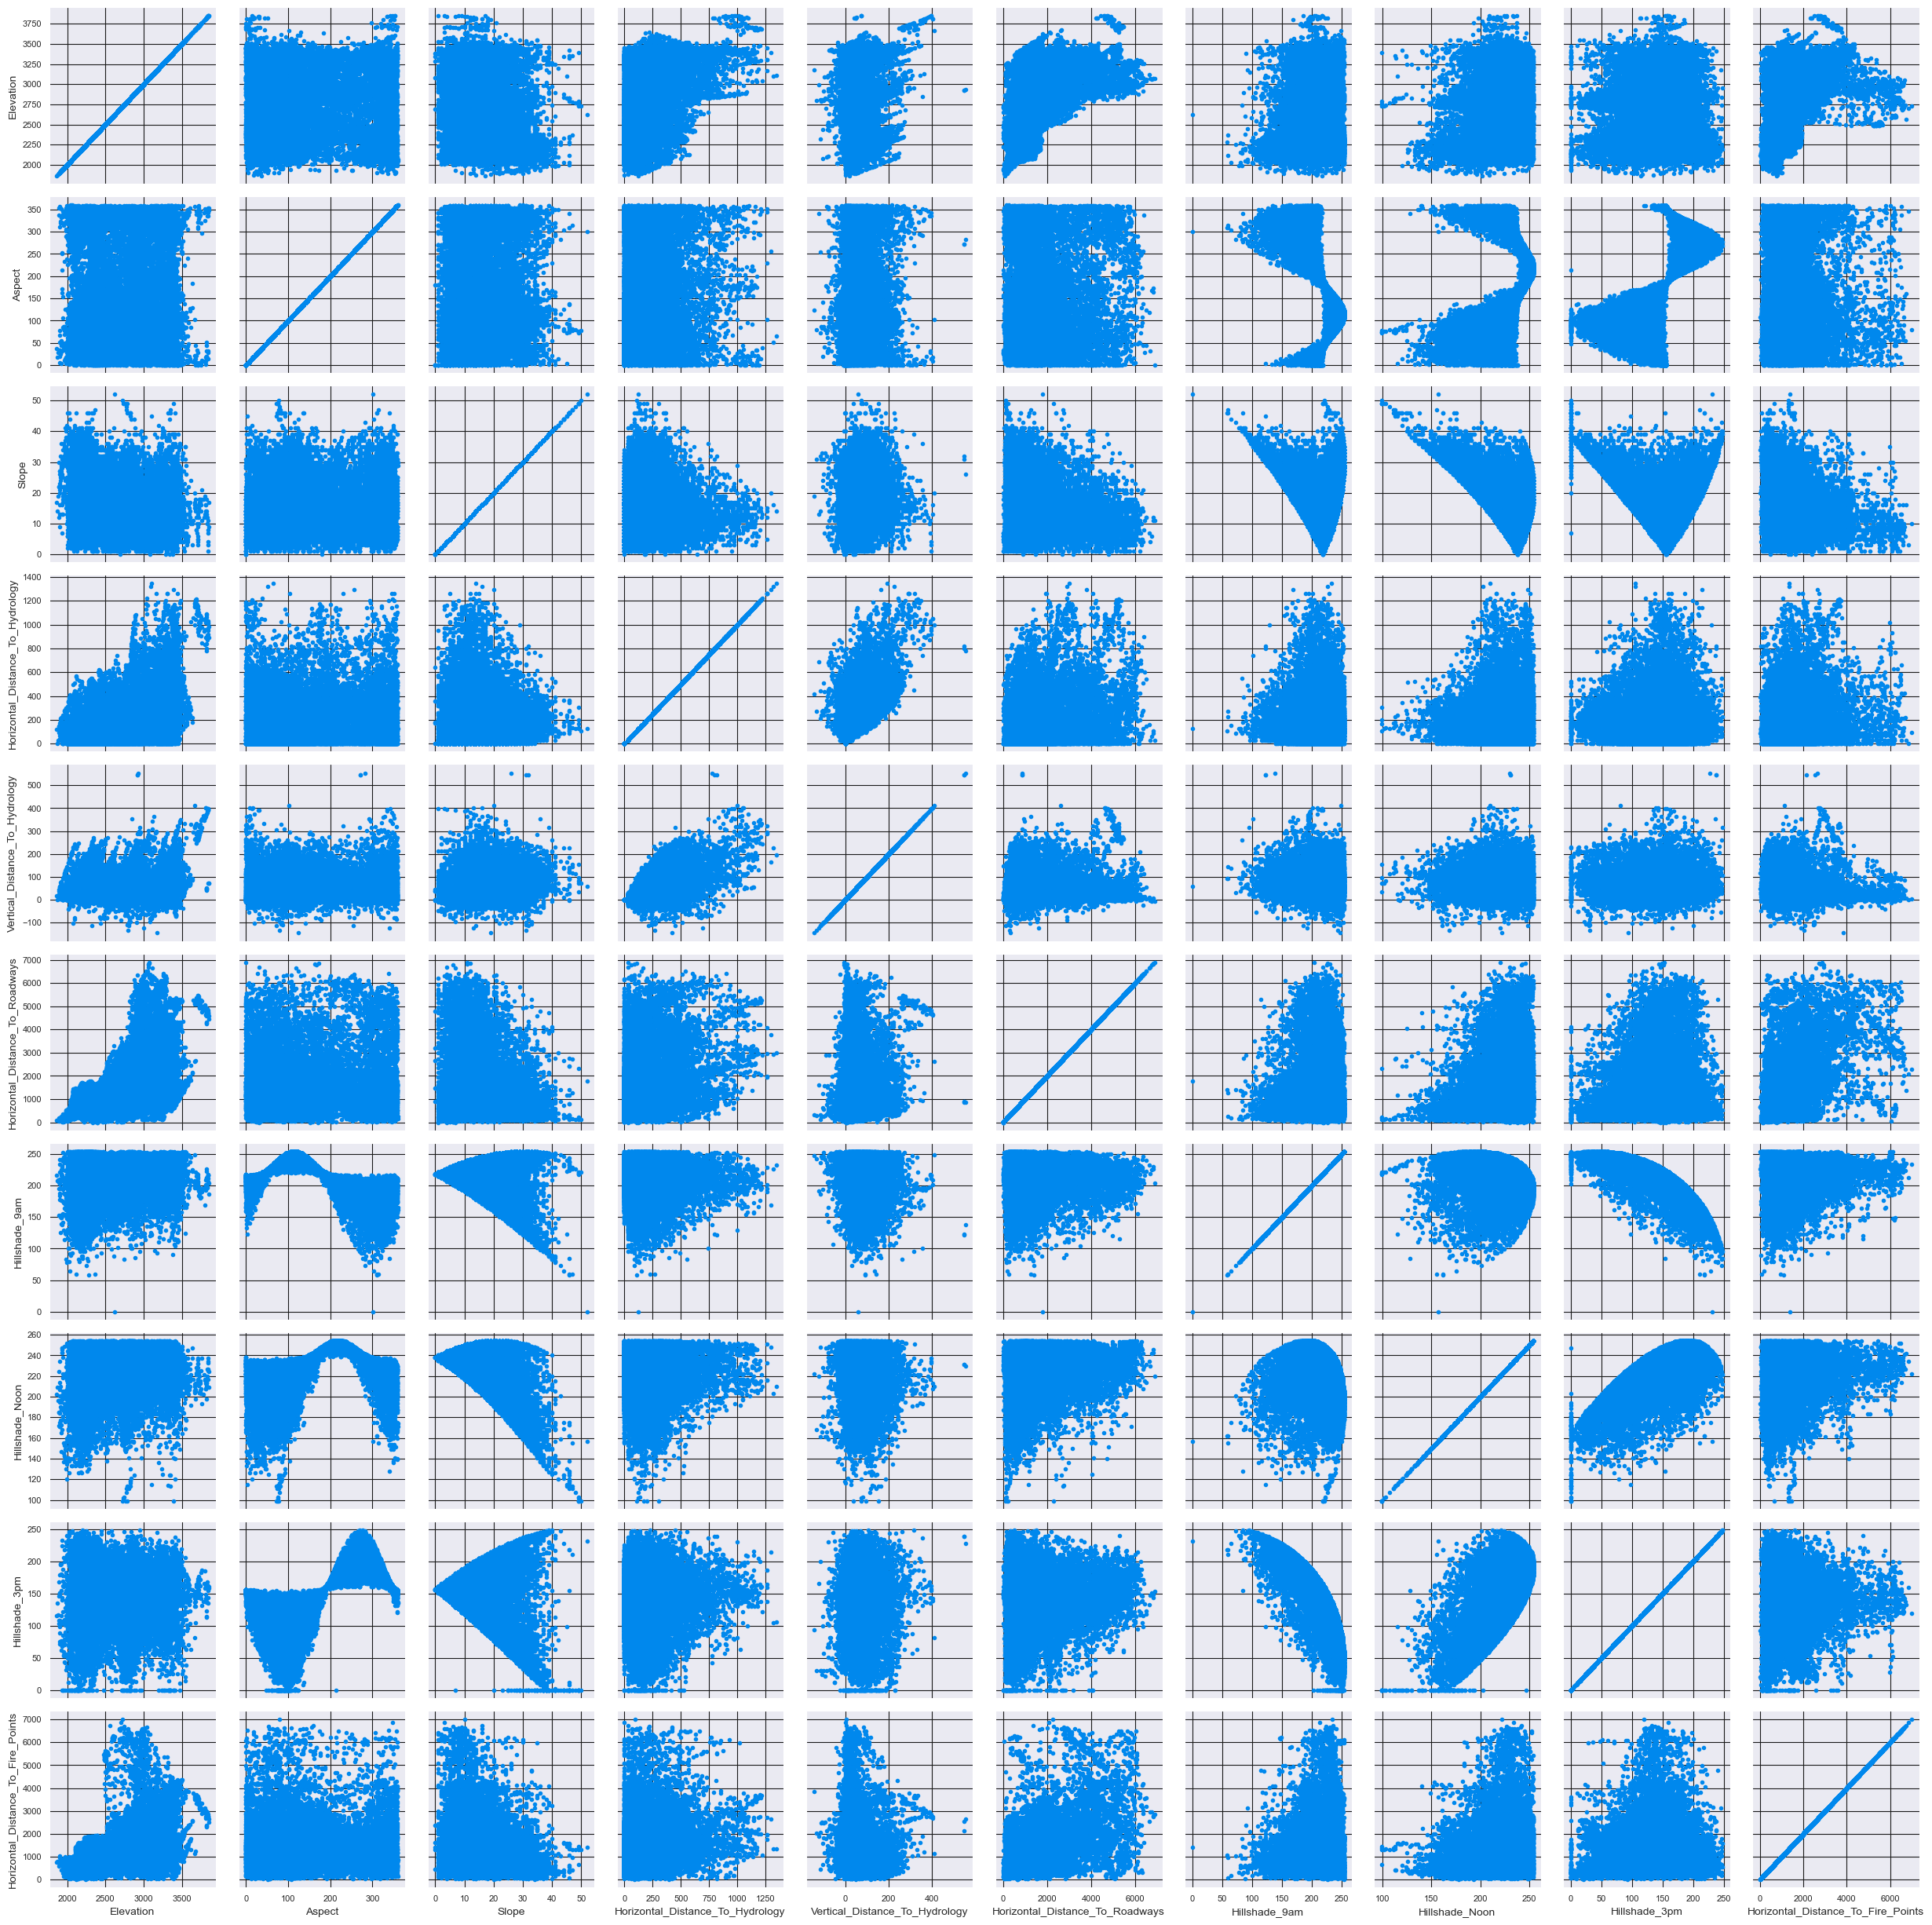

In [ ]:
plt.figure(figsize=(8,8))

x=sns.PairGrid(data1)
x.map(plt.scatter)

## Data Preprocessing

In [ ]:
## To check null value
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


* No null value 

In [ ]:
## Converting categorical value into numerical value =in the given data already converted .


In [ ]:
# skew distribution
data.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

* Hillshade's having negatively skewed distibution
* Soil_Type8 and Soil_Type 26 has the highest positive skewness meaning the mass of the distribution is concentrated to the left and has long tail to the right .

In [ ]:
# To check duplicated value
data.duplicated().sum()

0

In [ ]:
data=data.drop(['Soil_Type7','Soil_Type15'],axis=1)

In [ ]:
# To chcck missing value
missing_value=data.isnull().sum().sum()
print("There are {} missing values".format(missing_value))

There are 0 missing values


#### Since we are using DT and DT is robust to outliers and doesnot require scaling.

## Feature selection

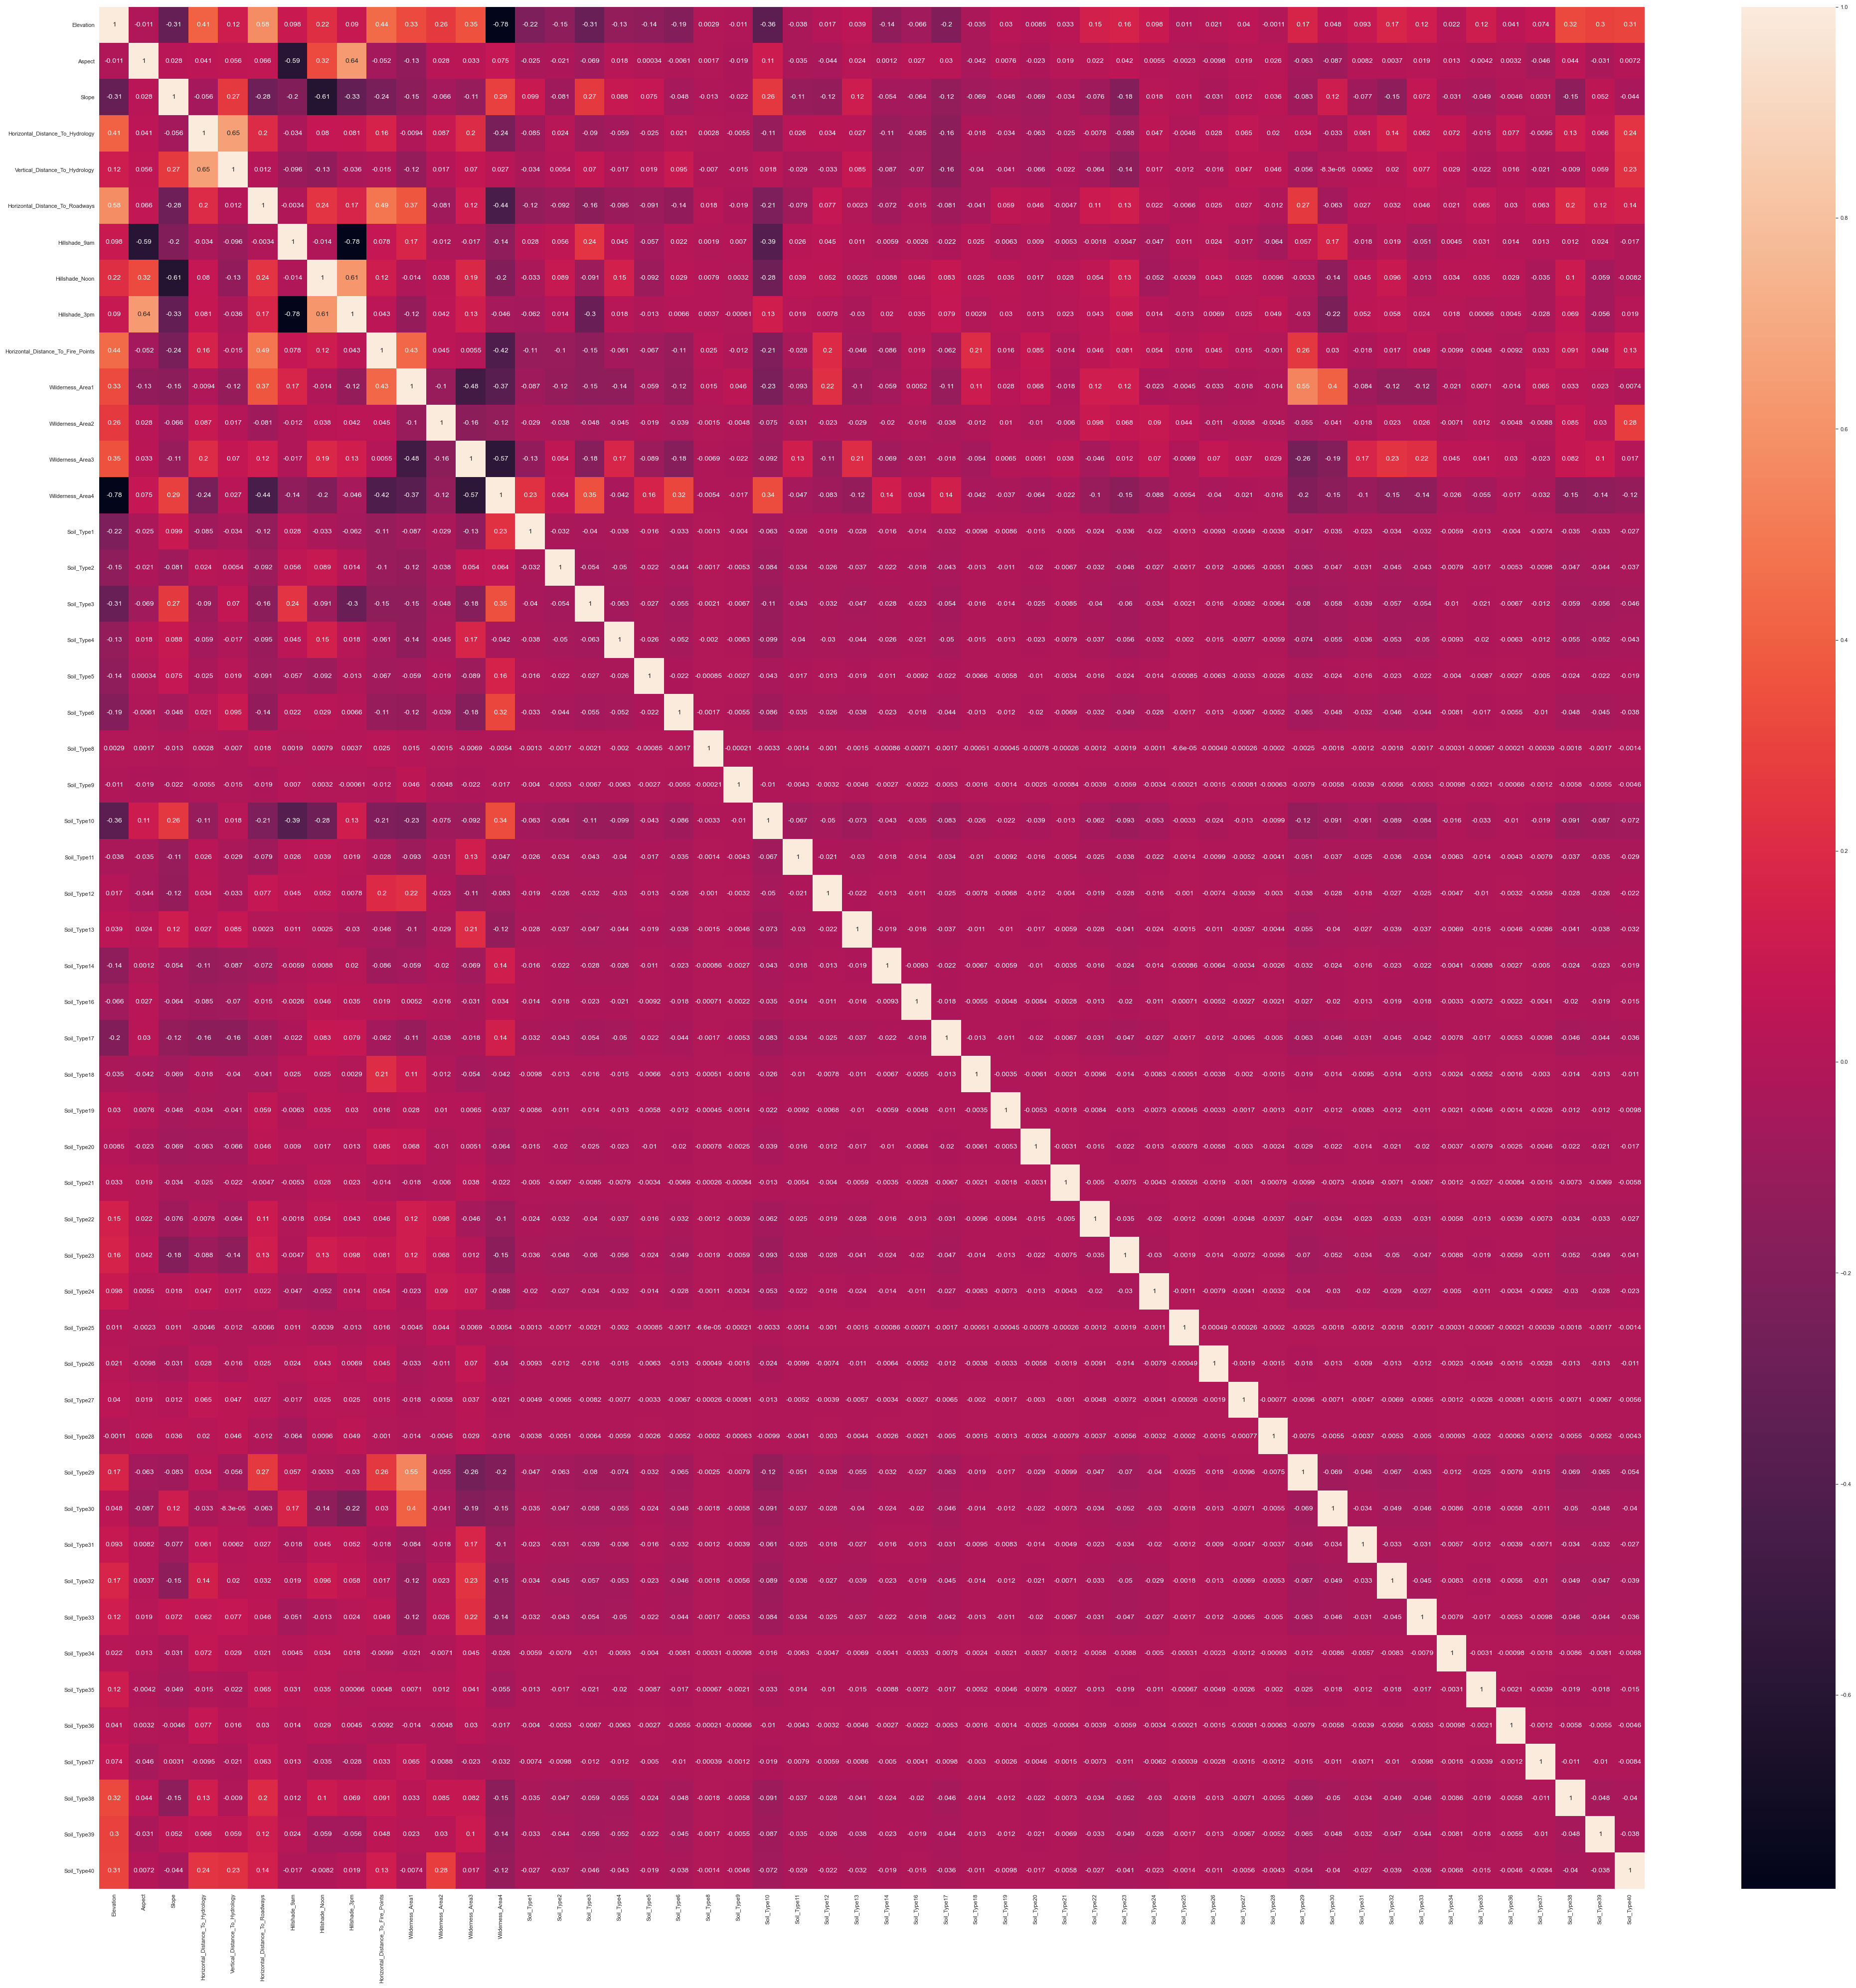

In [ ]:
## Checking correlation
plt.figure(figsize=(50,50))
sns.heatmap(data.drop('Cover_Type',axis=1).corr(),annot=True) # Checking for correlation
plt.show()#plotting heat map to check correlation

## Model Creation

In [ ]:
## Creating independent and dependent variable
X=data.drop('Cover_Type',axis=1)# independent variable
y=data.Cover_Type#dependent variable

## Model Evaluation

In [ ]:
### defining function for training models and measuring performance 

# to measure performance
from sklearn.model_selection import cross_val_score

# for calculating time elapsed
import time

# fucntion
def model_evaluation(clf):
    
    # passing classifier to a variable
    clf = clf
    
    # records time
    t_start = time.time()
    # classifier learning the model
    clf = clf.fit(X_train, y_train)
    # records time
    t_end = time.time()
    
    
    # records time
    c_start = time.time()     
    # Using 10 K-Fold CV on data, gives peroformance measures
    accuracy  = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro')
    # records the time
    c_end = time.time()    
    
    
    # calculating mean of all 10 observation's accuracy and f1, taking percent and rounding to two decimal places
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)

## Checking the TARGET variable(Cover_type) is balance or not

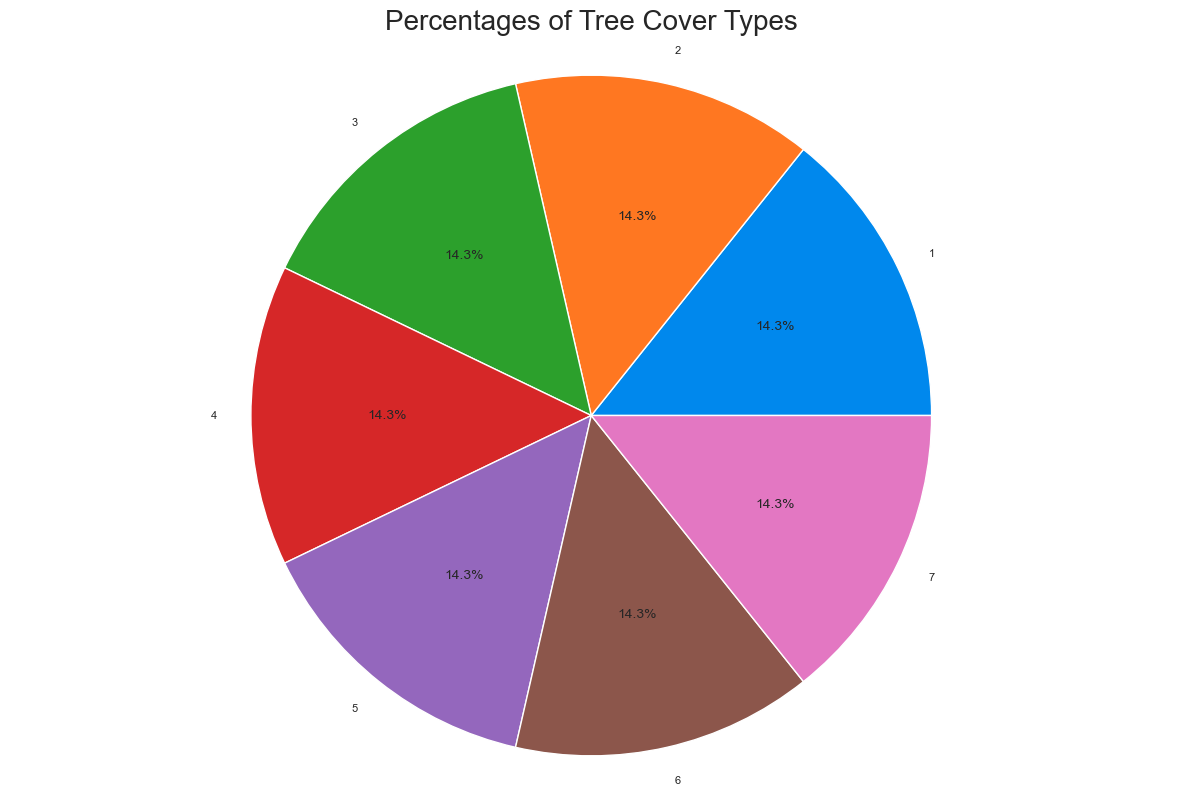

In [ ]:
labels='1','2','3','4','5','6','7' # Cover type
trees_dist=data.groupby('Cover_Type').size()
fig1,ax1=plt.subplots()
fig1.set_size_inches(15,10)
ax1.pie(trees_dist,labels=labels,autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Percentages of Tree Cover Types',fontsize=20)
plt.show()

* Target Column is balance no need to balance it

## Preparing Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

## Model Building

#### DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hat=dt.predict(X_test)#prediction
y_hat#predicated value

array([5, 7, 6, ..., 4, 4, 2], dtype=int64)

In [ ]:
y_train_predict=dt.predict(X_train)#predicting training data
y_train_predict

array([6, 2, 1, ..., 2, 2, 6], dtype=int64)

In [ ]:

# Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing metric
# training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accurarcy
acc_train

1.0

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.65      0.65      0.65       512
           2       0.63      0.62      0.62       546
           3       0.75      0.74      0.74       556
           4       0.92      0.94      0.93       566
           5       0.86      0.85      0.85       550
           6       0.78      0.75      0.76       538
           7       0.88      0.92      0.90       512

    accuracy                           0.78      3780
   macro avg       0.78      0.78      0.78      3780
weighted avg       0.78      0.78      0.78      3780



# Checking data is fully Trained or not

In [ ]:
print(classification_report(y_train,y_train_predict))#it will give precision,recall,f1 scores and accurarcy

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00      1614
           3       1.00      1.00      1.00      1604
           4       1.00      1.00      1.00      1594
           5       1.00      1.00      1.00      1610
           6       1.00      1.00      1.00      1622
           7       1.00      1.00      1.00      1648

    accuracy                           1.00     11340
   macro avg       1.00      1.00      1.00     11340
weighted avg       1.00      1.00      1.00     11340



In [ ]:
#test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy
print("To applying Decision Tree,the test accuracy is {} of the model".format(test_acc))

To applying Decision Tree,the test accuracy is 0.780952380952381 of the model


## Random Forest Technique

In [ ]:
# importing model for feature importance
from sklearn.ensemble import RandomForestClassifier

# passing the model
model = RandomForestClassifier(random_state = 53)

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['RFC']).sort_values('RFC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
RFC_feature_importances.head(10)

RFC
Elevation                           0.241535
Horizontal_Distance_To_Roadways     0.092615
Horizontal_Distance_To_Fire_Points  0.073572
Horizontal_Distance_To_Hydrology    0.061056
Vertical_Distance_To_Hydrology      0.053695
Hillshade_9am                       0.051401
Aspect                              0.050697
Hillshade_3pm                       0.045283
Hillshade_Noon                      0.044071
Slope                               0.036383

In [ ]:
rfc=RandomForestClassifier(n_estimators=200) #n_estimators mean it will take 200 decision tree

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_prediction=rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           1       0.74      0.76      0.75       512
           2       0.77      0.66      0.71       546
           3       0.85      0.78      0.81       556
           4       0.92      0.96      0.94       566
           5       0.89      0.93      0.91       550
           6       0.80      0.86      0.83       538
           7       0.92      0.96      0.94       512

    accuracy                           0.84      3780
   macro avg       0.84      0.84      0.84      3780
weighted avg       0.84      0.84      0.84      3780



In [ ]:
#test acc
test_acc=accuracy_score(y_test,y_prediction)#testing accuracy
print("To applying Random forest,the test accuracy is {} of the model".format(test_acc))

To applying Random forest,the test accuracy is 0.8441798941798941 of the model


# TO IMPLEMENT LINEAR REGRESSION ,LOGISTICS REGRESSION ,KNN, handle outliers

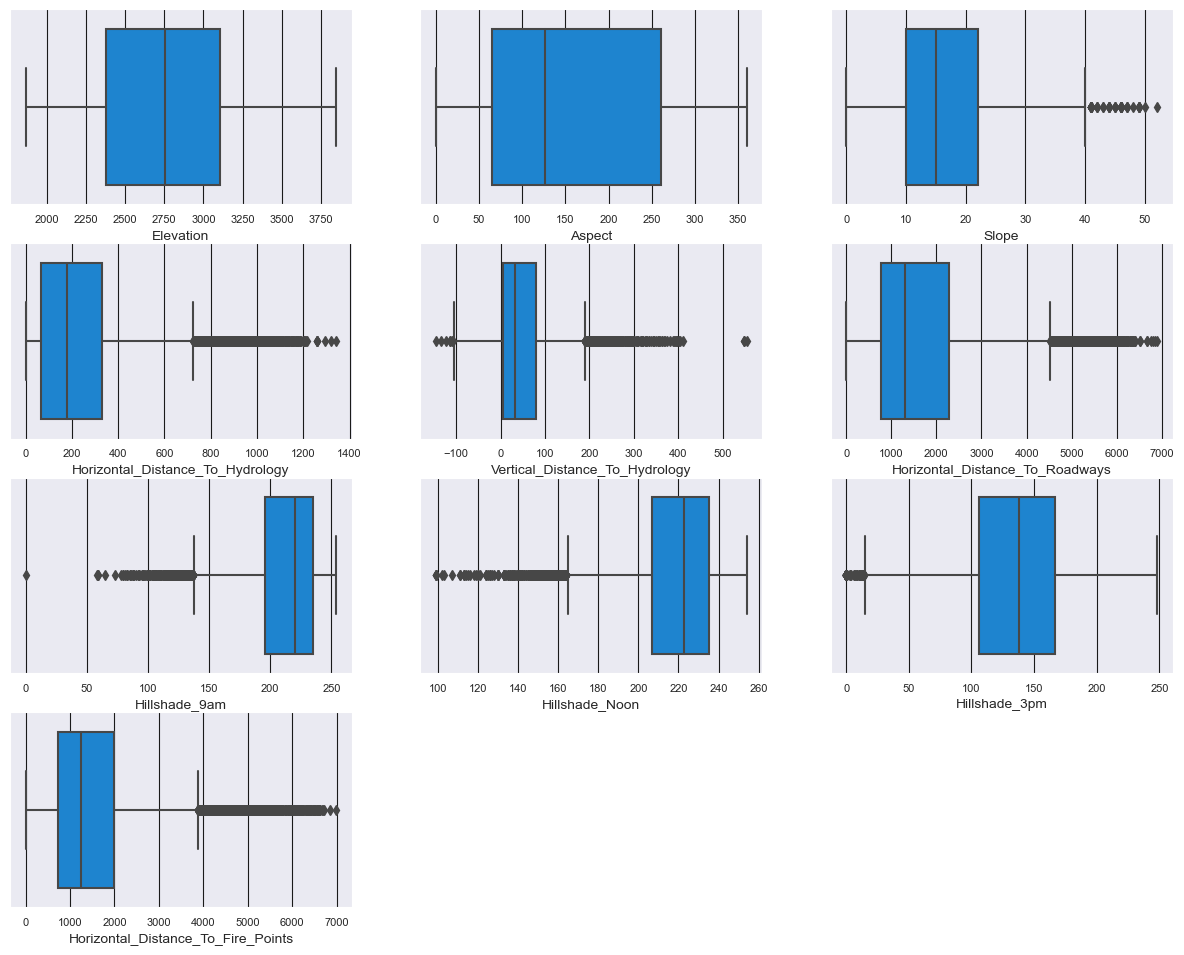

In [ ]:
# Handling outliers
plt.figure(figsize=(15,15 ),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<= 10:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    
    plotnumber+=1
plt.show()

 
    
    
 * 'Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' have outliers.
 * But we remove only Horizontal distance to hydrology, Vertical Distance to Hydrology,Horizontal Distance To fire points,the other columns are discrete variables(i.e, one-hot encoded columns like soil type,wildrness e.t.c) or have a pre set range that does not need normalization, like hillshade columns. 

#### Horizontal_Distance_To_Hydrology

In [ ]:
upper_limit=data.Horizontal_Distance_To_Hydrology.mean()+3*data.Horizontal_Distance_To_Hydrology.std()

lower_limit=data.Horizontal_Distance_To_Hydrology.mean()-3*data.Horizontal_Distance_To_Hydrology.std()
print(lower_limit)
print(upper_limit)

-403.0301860489743
857.4215881653764


In [ ]:
data.loc[data['Horizontal_Distance_To_Hydrology']<lower_limit]

Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

In [ ]:
len(data.loc[data['Horizontal_Distance_To_Hydrology']<lower_limit])

0

In [ ]:
#calculate percentage
data.shape[0]
len(data.loc[data['Horizontal_Distance_To_Hydrology']>upper_limit])

285

In [ ]:
data.loc[data['Horizontal_Distance_To_Hydrology']>upper_limit,'Horizontal_Distance_To_Hydrology']=data['Horizontal_Distance_To_Hydrology'].median()

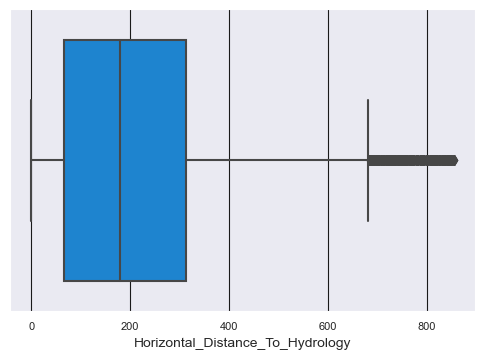

In [ ]:
sns.boxplot(x='Horizontal_Distance_To_Hydrology',data=data)
plt.show()

#### Vertical_Distance_To_Hydrology

In [ ]:
upper_limit=data.Vertical_Distance_To_Hydrology.mean()+3*data.Vertical_Distance_To_Hydrology.std()

lower_limit=data.Vertical_Distance_To_Hydrology.mean()-3*data.Vertical_Distance_To_Hydrology.std()
print(lower_limit)
print(upper_limit)

-132.6416972243147
234.79473955235702


In [ ]:
data.loc[data['Vertical_Distance_To_Hydrology']<lower_limit]

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1528        2795      80     31                               270   
10626       3175     124     19                               418   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
1528                             -134                              306   
10626                            -146                              319   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
1528             243             168             31   
10626            248             222             94   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
1528                                 2012                 1                 0   
10626                                3841                 0                 1   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
1528                  0                 0           0           0           0   
10626                 0                 0           0           0           0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  \
1528            0           0           0           0           0   
10626           0           0           0           0           0   

       Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
1528             0            0            0            0            0   
10626            0            0            0            0            0   

       Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  \
1528             0            0            0            0            0   
10626            0            0            0            0            0   

       Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  \
1528             0            0            0            0            0   
10626            0            1            0            0            0   

       Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  \
1528             0            0            0            0            1   
10626            0            0            0            0            0   

       Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
1528             0            0            0            0            0   
10626            0            0            0            0            0   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
1528             0            0            0            0            0   
10626            0            0            0            0            0   

       Cover_Type  
1528            5  
10626           2

In [ ]:
#Calculate percentage
data.shape[0]
len(data.loc[data['Vertical_Distance_To_Hydrology']>upper_limit])

211

In [ ]:
data.loc[data['Vertical_Distance_To_Hydrology']>upper_limit,'Vertical_Distance_To_Hydrology']=data['Vertical_Distance_To_Hydrology'].median()

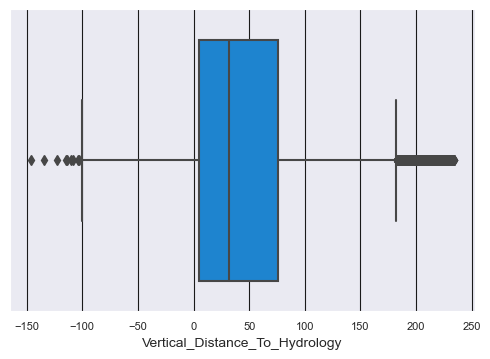

In [ ]:
sns.boxplot(x='Vertical_Distance_To_Hydrology',data=data)
plt.show()

#### Horizontal_Distance_To_Fire_Points

In [ ]:
upper_limit=data.Horizontal_Distance_To_Fire_Points.mean()+3*data.Horizontal_Distance_To_Fire_Points.std()

lower_limit=data.Horizontal_Distance_To_Fire_Points.mean()-3*data.Horizontal_Distance_To_Fire_Points.std()
print(lower_limit)
print(upper_limit)

-1788.6621896610507
4810.956766380627


In [ ]:
data.loc[data['Horizontal_Distance_To_Fire_Points']<lower_limit]

Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

In [ ]:
len(data.loc[data['Horizontal_Distance_To_Fire_Points']<lower_limit])

0

In [ ]:
#calculate percentage
data.shape[0]
len(data.loc[data['Horizontal_Distance_To_Fire_Points']>upper_limit])

331

In [ ]:
data.loc[data['Horizontal_Distance_To_Fire_Points']>upper_limit,'Horizontal_Distance_To_Fire_Points']=data['Horizontal_Distance_To_Fire_Points'].median()

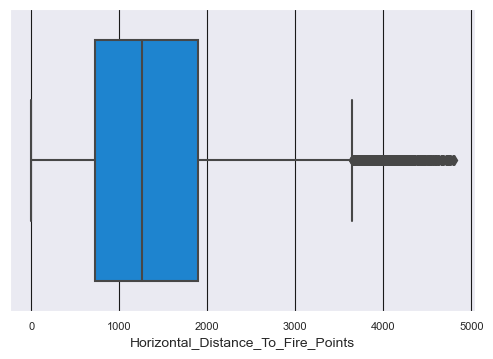

In [ ]:
sns.boxplot(x='Horizontal_Distance_To_Fire_Points',data=data)
plt.show()

### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
# Spliting input data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=50)

In [ ]:
X_test.shape

(3024, 52)

In [ ]:
y_test.shape

(3024,)

## KNN MOdel

In [ ]:
np.zeros((3024, 12096), dtype='uint8')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# importing K-Nearest Neighbors Classifier function
from sklearn.neighbors import KNeighborsClassifier

model_evaluation(KNeighborsClassifier(n_jobs=-1))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
print('acc_for_lr',accuracy_score(y_test,y_pred_lr)*100)

acc_for_lr 48.71031746031746


In [ ]:
print(confusion_matrix(y_test,y_pred_lr))

[[188  41   0   0  53  12 109]
 [ 88 161   8   2  83  31  42]
 [  4  31 174  75  55 107   1]
 [  0   5  84 322  14  16   0]
 [ 14  77  14   1 220  73  23]
 [ 16  43 132  56  65 122   8]
 [139  15   0   0  12   2 286]]


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           1       0.42      0.47      0.44       403
           2       0.43      0.39      0.41       415
           3       0.42      0.39      0.41       447
           4       0.71      0.73      0.72       441
           5       0.44      0.52      0.48       422
           6       0.34      0.28      0.30       442
           7       0.61      0.63      0.62       454

    accuracy                           0.49      3024
   macro avg       0.48      0.49      0.48      3024
weighted avg       0.48      0.49      0.48      3024



## SVM Model

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_pred_svm=svm.predict(X_test)

In [ ]:
print('acc_for_svm',accuracy_score(y_test,y_pred_svm)*100)

acc_for_svm 64.55026455026454


In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           1       0.65      0.56      0.60       403
           2       0.57      0.41      0.48       415
           3       0.53      0.45      0.49       447
           4       0.71      0.81      0.75       441
           5       0.63      0.79      0.70       422
           6       0.56      0.54      0.55       442
           7       0.80      0.93      0.86       454

    accuracy                           0.65      3024
   macro avg       0.63      0.64      0.63      3024
weighted avg       0.63      0.65      0.64      3024



## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #Imort Gradient Boosting cla
gbm=GradientBoostingClassifier()#object the creation
gbm.fit(X_train,y_train)#fit the model

GradientBoostingClassifier()

In [ ]:
y_gbm=gbm.predict(X_test)#predict the model


In [ ]:
y_gbm_train=gbm.predict(X_train)

In [ ]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.8125

# Conclusion

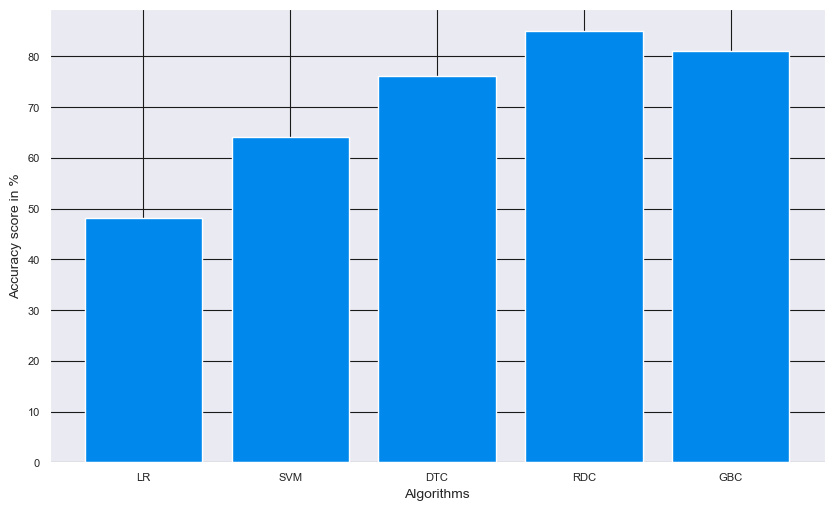

In [ ]:
dict_sc_algo={'LR':48.1,"SVM":64,'DTC':76.2,'RDC':85,'GBC':81}
algo=list(dict_sc_algo.keys())
score=list(dict_sc_algo.values())
plt.figure(figsize=(10,6))
plt.bar(algo,score)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score in %')
plt.show()

In [ ]:
*  The best model is Random forest .We get more accurate result compare to other


SyntaxError: invalid syntax (<ipython-input-88-8d832796e3ef>, line 1)